<div style="display: flex; background-color:rgb(214, 234, 248 );" >
<h1 style="text-align: center;margin: auto; padding: 40px; "> Classifiez automatiquement des biens de consommation
    Projet 6 Notebook texte</h1>
    <p >  Zeynep Erdem 
      
</p>
      
  
</div>

<div>
    <img style="float: right;margin:80px 5px 5px 0.1px" width="300px" src="logo.png"  height=500   />
</div>
<div style="display: flex; background-color:rgb(213, 219, 219);" >
<div> 
    
* Je suis Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.
    
* Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.
Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.

* Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.



* Linda, Lead Data Scientist, me demande :

   1 - d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories.
    
   2 - réaliser une classification supervisée à partir des images ? Je souhaiterais que tu mettes en place une data augmentation afin d’optimiser le modèle.
   
   3 - tester la collecte de produits à base de “champagne” via l’API [disponible ici](https://rapidapi.com/edamam/api/edamam-food-and-grocery-database) en respectant des normes de RGPD. 
    
* Voici [les données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip) 

</div>

</div>

<a name="top"></a>

# Sommaire :

**Partie 1**

 - <a href="#C1"> 1.1 Importation des librairies</a>
 - <a href="#C2"> 1.2 Importation des données et les fonctions</a>
 
**Partie 2 : Les analyses exploratoires**
 - <a href="#C3"> 2.1 Les analyses exploratoires </a>
 
**Partie 3 : Nettoyage du texte et les examples des étapes de préparation du texte**
 - <a href="#C4"> 3.1 Nettoyage du texte et les examples des étapes de préparation du texte</a>
 
**Partie 4 : Etude de Faisabilité**
 - <a href="#C14"> Etude de Faisabilité </a> 
 - <a href="#C5"> 4.1 Bag of words </a> 
 - <a href="#C6"> 4.1.a Count vectorizer / Tf-idf</a>
 - <a href="#C7"> 4.2 Word embedding</a>
 - <a href="#C8"> 4.2.a Word2vec</a>
 - <a href="#C9"> 4.2.b BERT</a>
 - <a href="#C10"> 4.2.c USE - Universal Sentence Encoder</a>
 - <a href="#C11"> 4.3 Comparaison des résultats</a>

**Partie 5 : Classification supervisée**
 - <a href="#C12"> 5.1 Classification supervisée</a> 
 - <a href="#C13"> 5.2 Comparaison des résultats</a> 


In [1]:
pwd

'/Users/zeyneperdem/Desktop/ds_prep/p6/new'

# <a name="C1"> 1.1 Importation des librairies</a>
<a href="#top">sommaire</a>

In [2]:
# Importation des libraries
import os, sys, time, random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import sklearn

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import pickle
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD , PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
import wordcloud
from wordcloud import WordCloud
from PIL import Image

import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Les versions des libraries
print("Python: ", sys.version)
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Seaborn: ", sns.__version__)
print("Matplotlib: ", matplotlib.__version__)
print("Missingno: ", msno.__version__)
print("Sklearn: ",sklearn.__version__)
print("Wordcloud: ",wordcloud.__version__)
print("Nltk: ",nltk.__version__)

Python:  3.9.16 (main, May 16 2023, 14:27:50) 
[Clang 14.0.6 ]
Pandas:  2.0.3
Numpy:  1.23.5
Seaborn:  0.12.2
Matplotlib:  3.7.1
Missingno:  0.5.2
Sklearn:  1.3.0
Wordcloud:  1.9.2
Nltk:  3.8.1


In [4]:
# Les options pour visualisations des dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1200)
#pd.set_option('display.max_rows', 200)

# <a name="C2"> 1.2 Importation des données et les fonctions</a>
<a href="#top">sommaire</a>

In [5]:
df = pd.read_csv("/Users/zeyneperdem/Desktop/ds_prep/p6/data/Flipkart/flipkart_com-ecommerce_sample_1050.csv")
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Mo...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=>""Sathiyas cotton bath towel""}, {""key""=>""Ideal For"", ""value""=>""Men, Women, Boys, Girls""}, {""key""=>""Model ID"", ""value""=>""asvtwl322""}, {""key""=>""Color"", ""value""=>""Red, Yellow, Blue""}, {""key""=>""Size"", ""value""=>""Mediam""}, {""key""=>""Length"", ""valu

In [6]:
def pourcentage_null_text(df):
    """
    On donne l'infos pourcentage des valeurs nulles pour le dataframe en texte
    :param df: dataframe
    :return: none
    """
    all_num_data = df.shape[0] * df.shape[1]
    num_null = df.isnull().sum().sum()
    pourcentage_null = ((num_null / all_num_data) * 100).round(2)
    print("** On a ", pourcentage_null, "% de valeur nulle dans notre dataframe **")
    return pourcentage_null

In [7]:
def per_null_dataframe(df):
    """
    On donne l'infos pourcentage des valeurs nulles pour le dataframe en détaille
    On display pourcentage des valeurs nulles par colonne en descendant
    :param df: dataframe
    :return: le dataframe des pourcentages
    """
    per_null = (df.isnull().mean() * 100).round(2)
    nombre_null = df.isnull().sum()
    null_df = pd.concat([nombre_null, per_null], axis=1)
    null_df.columns = ["nombre_null", "pourcentage_null"]
    return null_df.sort_values("nombre_null", ascending=False)

In [8]:
def info_general(df):
    """
    On donne les infos générales pour le dataframe
    :param df: dataframe
    :return: none
    """
    print("*" * 25, "* INFORMATIONS GENERALES DE NOTRE DATAFRAME *", "*" * 25)
    print("-" * 100)
    shape_df = df.shape
    print("" * 100)
    print(
        "Il y a",
        shape_df[0],
        "lignes et",
        shape_df[1],
        "colonnes dans notre dataframe.",
    )
    print("-" * 100, sep="\n")
    print("* On obtiens l'info sur notre dataframe *", "" * 100)
    print("-" * 100, sep="\n")
    print(df.info())
    print("-" * 100, sep="\n")
    print("* On obtient les informations statistiques sur notre dataframe *", "" * 100)
    print("-" * 100, sep="\n")
    display(df.describe(include="all").T)
    print("-" * 100, sep="\n")
    print("*On vérifie s'il y a des doublons dans notre dataframe*", "" * 100)
    search_dup = df.duplicated().sum()
    if search_dup == 0:
        print("** Il n'y a pas de doublons **")
    else:
        print("** Il y a ", search_dup, " doublons **")
    print("-" * 100)
    print(
        "** On vérifie s'il y a des valeurs nulles et "
        "on display pourcentage des valeurs nulles par colonne en descendant **"
    )
    print("-" * 100)
    pourcentage_null = pourcentage_null_text(df)
    if pourcentage_null > 0:
        display(per_null_dataframe(df))
        print("** Visualisation des valeurs nulles **", "" * 100)
        msno.bar(df)
    else:
        pourcentage_null
    print("-" * 100, sep="\n")

    return



# <a name="C3"> 2.1 Les analyses exploratoires</a>
<a href="#top">sommaire</a>

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 1050 lignes et 15 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uniq_id,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crawl_timestamp,1050,149,2015-12-01 12:40:44 +0000,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,1050,1050,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1050,1050,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_tree,1050,642,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pid,1050,1050,CRNEG7BKMFFYHQ8Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_price,1049.0,NaN,NaN,NaN,2186.197331,7639.229411,35.0,555.0,999.0,1999.0,201000.0
discounted_price,1049.0,NaN,NaN,NaN,1584.527169,7475.09968,35.0,340.0,600.0,1199.0,201000.0
image,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_FK_Advantage_product,1050,2,False,993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  2.17 % de valeur nulle dans notre dataframe **


,nombre_null,pourcentage_null
brand,338,32.19
retail_price,1,0.10
discounted_price,1,0.10
product_specifications,1,0.10
uniq_id,0,0.00
crawl_timestamp,0,0.00
product_url,0,0.00
product_name,0,0.00
product_category_tree,0,0.00
pid,0,0.00


** Visualisation des valeurs nulles ** 
----------------------------------------------------------------------------------------------------


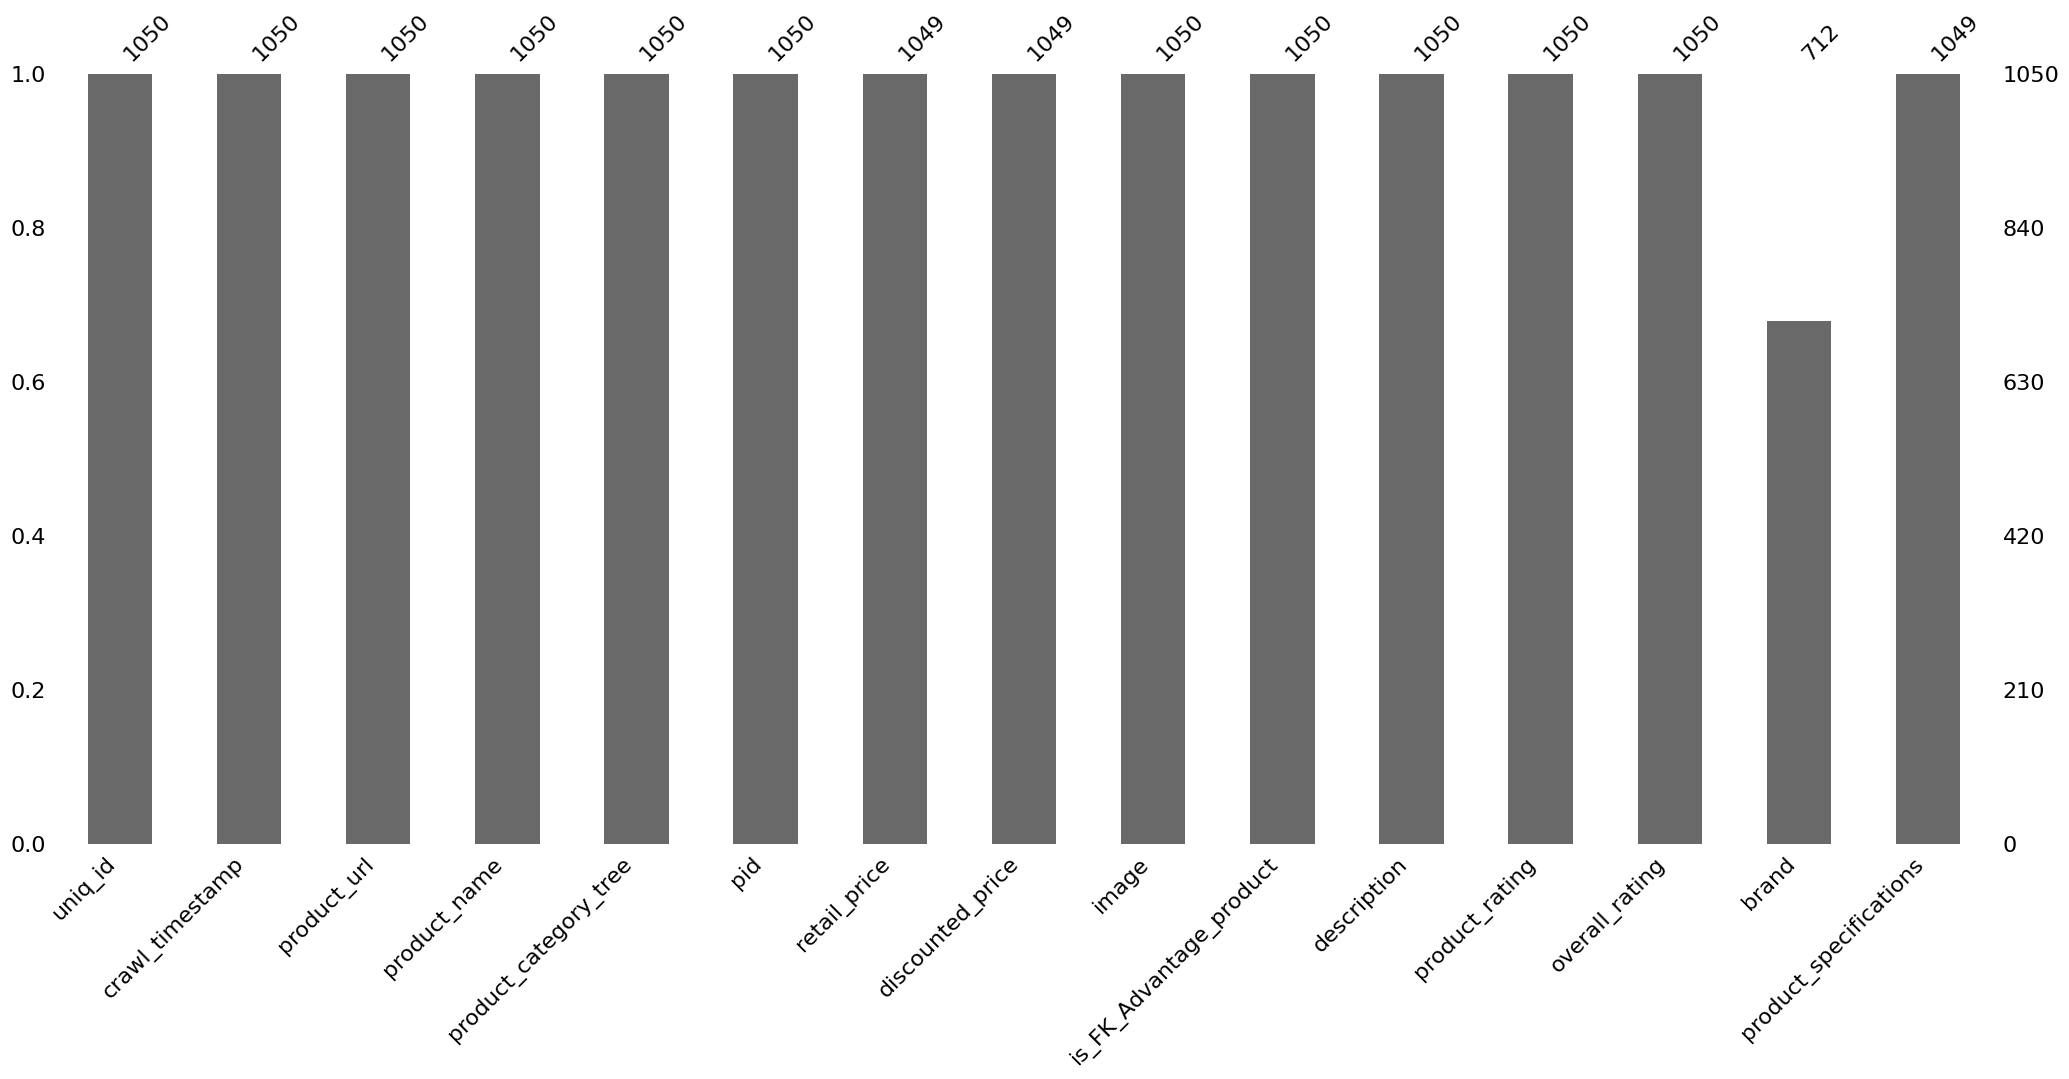

In [9]:
info_general(df)

On a des valeurs manquantes mais ils ne sont pas important pour nos analyses.

In [10]:
# On supprime les colonnes qui ne sont pas necessaires
cols_drop = ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'pid', 'retail_price', 'discounted_price',
       'is_FK_Advantage_product', 'product_rating',
       'overall_rating', 'brand', 'product_specifications']

In [11]:
df = df.drop(cols_drop, axis=1)
df.head(2)

,product_category_tree,image,description
0,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Mo..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel"


In [12]:
# On obtient la première partie de la catégorie
df.product_category_tree[1].split('["')[1].split(">>")[0].strip()

'Baby Care'

In [13]:
df["category"] = df["product_category_tree"].apply(lambda x: x.split('["')[1].split(">>")[0].strip())
df = df.drop("product_category_tree", axis=1)
df.head(2)

,image,description,category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Mo...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",Baby Care


In [14]:
df.category.value_counts()

category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [15]:
df.category = df.category.str.replace('&', 'and')
df.category.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor and Festive Needs', 'Kitchen and Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

# <a name="C4"> 3.1 Nettoyage du texte et les examples des étapes de préparation du texte</a>
<a href="#top">sommaire</a>

In [16]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').\
    replace('&', 'and')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Stemmatizer (exclure suffix d'un mot)
from nltk.stem import PorterStemmer

def stemmer_fct(list_words) :
    stemmatizer = PorterStemmer()
    stem_w = [stemmatizer.stem(w) for w in list_words]
    return stem_w

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [17]:
df_clean = df.copy()

In [18]:
df_clean['description_bow'] = df_clean['description'].apply(lambda x : transform_bow_fct(x))
df_clean['description_bow_lem'] = df_clean['description'].apply(lambda x : transform_bow_lem_fct(x))
df_clean['description_dl'] = df_clean['description'].apply(lambda x : transform_dl_fct(x))
print(df_clean.shape)
df_clean.head(3)

(1050, 6)


,image,description,category,description_bow,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Mo...",Home Furnishing,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimensions length 213 box number contents sales package pack sales package curtains body design material polyester,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimension length 213 box number content sale package pack sale package curtain body design material polyester,"key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors.this curtain is made from 100 % high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this 

## Le test sur une phrase d'exemple, pour illustrer la bonne réalisation des  étapes précédentes.

In [19]:
df_test = df.copy()
test = df_test.description[0]
test

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

(-0.5, 599.5, 299.5, -0.5)

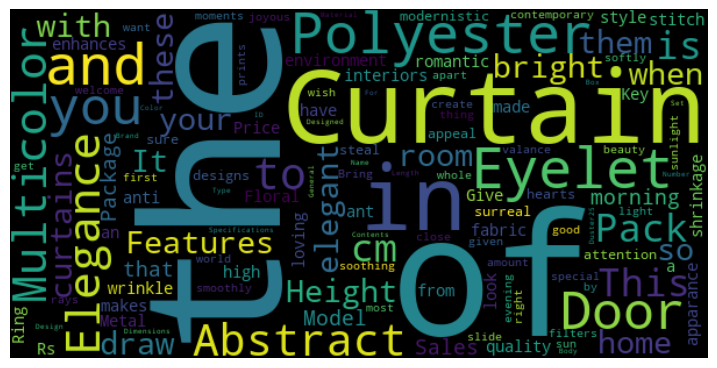

In [20]:
wordcloud = WordCloud(
    random_state=8,
    normalize_plurals=False,
    width=600,
    height=300,
    max_words=300,
    stopwords=[]
)
# Apply the wordcloud to the text.
wordcloud.generate(test)
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

On voit les mots les plus fréquents comme "the", "of, "Curtain", etc.

### Etape 1-2 : Nettoyage les champs de texte (suppression de la ponctuation et des mots de liaison, mise en minuscules)  et Tokenization

#### Tokenization et changement certaines caractères comme #, /

In [21]:
test_tokens = tokenizer_fct(test)
print(test_tokens)
print("-" * 100)
print ("Il y a ", len(test_tokens), "tokens")

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 

#### Suppression de la ponctuation et des mots de liaison

In [22]:
filtered_words = stop_word_filter_fct(test_tokens)
print(filtered_words)
print("-" * 100)
print ("Il y a ", len(filtered_words), "filtered_words")

['Key', 'Features', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '213', 'Height', 'Pack', 'Price', '899', 'This', 'curtain', 'enhances', 'look', 'interiors.This', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'eyelet', 'style', 'stitch', 'Metal', 'Ring.It', 'makes', 'room', 'environment', 'romantic', 'loving.This', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance.Give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'The', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'These', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'pri

(-0.5, 599.5, 299.5, -0.5)

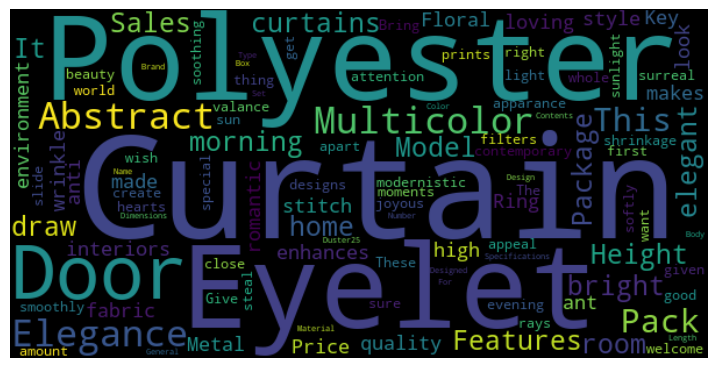

In [23]:
wordcloud = WordCloud(
    random_state=8,
    normalize_plurals=False,
    width=600,
    height=300,
    max_words=300,
    stopwords=[]
)
# Apply the wordcloud to the text.
wordcloud.generate(" ".join(filtered_words))
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

Après l'application des stopwords, on ne voit plus les mots tels que 'the', 'of', etc.

#### Mise en minuscules

In [24]:
lower_words = lower_start_fct(filtered_words)
print(lower_words)
print("-" * 100)
print ("Il y a ", len(lower_words), "lower_words")

['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'height', 'pack', 'price', '899', 'this', 'curtain', 'enhances', 'look', 'interiors.this', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric.it', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring.it', 'makes', 'room', 'environment', 'romantic', 'loving.this', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance.give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'the', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'these', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'pri

### Etape 3 Stemmation

In [25]:
stems = stemmer_fct(lower_words)
print(stems)
print("-" * 100)
print ("Il y a ", len(stems), "stemmed_words")

['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'height', 'pack', 'price', '899', 'thi', 'curtain', 'enhanc', 'look', 'interiors.thi', 'curtain', 'made', '100', 'high', 'qualiti', 'polyest', 'fabric.it', 'featur', 'eyelet', 'style', 'stitch', 'metal', 'ring.it', 'make', 'room', 'environ', 'romant', 'loving.thi', 'curtain', 'ant', 'wrinkl', 'anti', 'shrinkag', 'eleg', 'apparance.g', 'home', 'bright', 'modernist', 'appeal', 'design', 'the', 'surreal', 'attent', 'sure', 'steal', 'heart', 'these', 'contemporari', 'eyelet', 'valanc', 'curtain', 'slide', 'smoothli', 'draw', 'apart', 'first', 'thing', 'morn', 'welcom', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morn', 'whole', 'world', 'draw', 'close', 'even', 'creat', 'special', 'moment', 'joyou', 'beauti', 'given', 'sooth', 'print', 'bring', 'home', 'eleg', 'curtain', 'softli', 'filter', 'li

### Etape 4 Lemmatisation

In [26]:
lemmas = lemma_fct(lower_words)
print(lemmas)
print("-" * 100)
print ("Il y a ", len(lemmas), "lemmatized_words")

['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'height', 'pack', 'price', '899', 'this', 'curtain', 'enhances', 'look', 'interiors.this', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric.it', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring.it', 'make', 'room', 'environment', 'romantic', 'loving.this', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance.give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'the', 'surreal', 'attention', 'sure', 'steal', 'heart', 'these', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'br

(-0.5, 599.5, 299.5, -0.5)

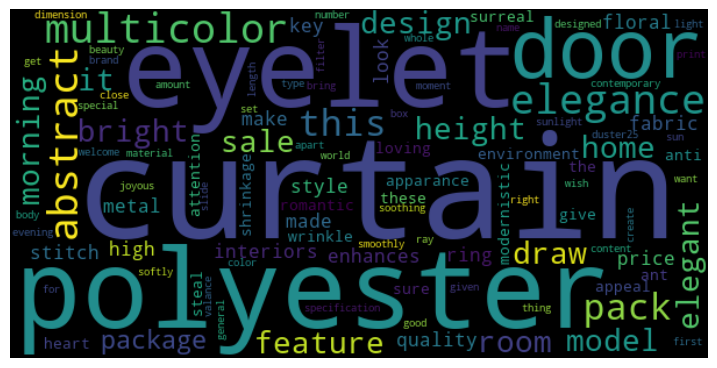

In [27]:
wordcloud = WordCloud(
    random_state=8,
    normalize_plurals=False,
    width=600,
    height=300,
    max_words=300,
    stopwords=[]
)
# Apply the wordcloud to the text.
wordcloud.generate(" ".join(lemmas))
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

### Etape 5 Construire des features ("feature engineering") de type bag-of-words (bag-of-words standard : comptage de mots, et Tf-idf), avec des étapes de nettoyage supplémentaires : seuil de fréquence des mots, normalisation des mots.

In [28]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
test_bow = transform_bow_fct(test)
test_bow

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 

In [29]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
test_bow_lem = transform_bow_lem_fct(test)
test_bow_lem

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multi

### Création du bag of words (CountVectorizer)

In [30]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)# max_features
feat_test = lemmas
cv_fit_test = cvect.fit(feat_test)
cv_transform_test = cvect.transform(feat_test)
df_cv_test = pd.DataFrame(cv_transform_test.toarray(), columns=cvect.get_feature_names_out())
df_cv_test.head()

,100,213,899,abstract,ant,anti,apart,apparance,appeal,attention,beauty,body,box,brand,bright,bring,close,color,contemporary,content,create,curtain,design,designed,dimension,door,draw,duster25,elegance,elegant,enhances,environment,evening,eyelet,fabric,feature,filter,floral,general,given,good,heart,height,high,home,interiors,joyous,key,length,light,look,loving,make,material,metal,model,modernistic,moment,morning,multicolor,number,pack,package,polyester,price,print,quality,ray,right,ring,romantic,room,sale,set,shrinkage,slide,smoothly,softly,soothing,special,specification,steal,stitch,style,sun,sunlight,sure,surreal,thing,type,valance,want,welcome,wish,world,wrinkle
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df_cv_test.shape

(155, 96)

### Création du bag of words ( Tf-idf)

In [32]:
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
feat_test = lemmas
ctf_fit_test = ctf.fit(feat_test) 
ctf_transform_test = ctf.transform(feat_test)
df_ctf_test = pd.DataFrame(ctf_transform_test.toarray(), columns=ctf.get_feature_names_out())
df_ctf_test.head()

,100,213,899,abstract,ant,anti,apart,apparance,appeal,attention,beauty,body,box,brand,bright,bring,close,color,contemporary,content,create,curtain,design,designed,dimension,door,draw,duster25,elegance,elegant,enhances,environment,evening,eyelet,fabric,feature,filter,floral,general,given,good,heart,height,high,home,interiors,joyous,key,length,light,look,loving,make,material,metal,model,modernistic,moment,morning,multicolor,number,pack,package,polyester,price,print,quality,ray,right,ring,romantic,room,sale,set,shrinkage,slide,smoothly,softly,soothing,special,specification,steal,stitch,style,sun,sunlight,sure,surreal,thing,type,valance,want,welcome,wish,world,wrinkle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_ctf_test.shape

(155, 96)

# <a name="C14"> Etude de Faisabilité</a>
<a href="#top">sommaire</a>

## Préparation commune des traitements

### Lecture dataset

In [34]:
df_clean.head(1)

,image,description,category,description_bow,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Mo...",Home Furnishing,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimensions length 213 box number contents sales package pack sales package curtains body design material polyester,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimension length 213 box number content sale package pack sale package curtain body design material polyester,"key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors.this curtain is made from 100 % high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this 

In [35]:
l_cat = list(set(df_clean['category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_clean.iloc[i]['category'])) for i in range(len(df_clean))]

catégories :  ['Kitchen and Dining', 'Home Furnishing', 'Baby Care', 'Home Decor and Festive Needs', 'Watches', 'Computers', 'Beauty and Personal Care']


In [36]:
from nltk.tokenize import sent_tokenize, word_tokenize

df_clean['length_bow'] = df_clean['description_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df_clean['length_bow'].max())
df_clean['length_dl'] = df_clean['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df_clean['length_dl'].max())


max length bow :  379
max length dl :  632


## Fonctions communes

In [37]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1, 2)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_, time2 


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des articles par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des articles par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# <a name="C5"> 4.1 Bag of words</a>
<a href="#top">sommaire</a>

## <a name="C6"> 4.1.a Count vectorizer / Tf-idf</a>
<a href="#top">sommaire</a>

**Count Vectorizer :**
Le Count Vectorizer convertit le texte en une matrice où les lignes représentent les documents et les colonnes représentent les mots. Chaque cellule de la matrice contient le nombre d'occurrences d'un mot dans un document. Il est simple mais ne tient pas compte de l'importance des mots.

**TF-IDF (Term Frequency-Inverse Document Frequency) :**
Le TF-IDF prend en compte à la fois la fréquence d'un mot dans un document (TF) et son importance dans l'ensemble du corpus (IDF). Il attribue des scores plus élevés aux mots importants et rares, et des scores plus bas aux mots fréquents mais peu informatifs. Cela en fait une méthode plus avancée pour la représentation de texte.

## Préparation descriptions

In [38]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# max_df : les mots qui apparaissent dans plus de 95% des documents seront ignorés
# min_df : les mots qui n'apparaissent que dans un seul document seront ignorés
# ngram_range=(1, 2) : inclurait à la fois les mots individuels et les paires de mots adjacents (bigrammes)
# dans la représentation vectorielle.
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1) # ngram_range=(1, 2)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1) # ngram_range=(1, 2)

feat = 'description_bow_lem'
cv_fit = cvect.fit(df_clean[feat])
ctf_fit = ctf.fit(df_clean[feat])

cv_transform = cvect.transform(df_clean[feat])  
ctf_transform = ctf.transform(df_clean[feat])  

### Exemple Count vectorizer

In [39]:
df_cv = pd.DataFrame(cv_transform.toarray(), columns=ctf.get_feature_names_out())
df_cv .shape

(1050, 5326)

In [40]:
cond1 = df_cv.iloc[0,:]!=0
numbers = df_cv.columns[cond1]
df_cv[numbers].head(3)

,100,213,899,abstract,ant,anti,apart,apparance,appeal,attention,beauty,body,box,brand,bright,bring,close,color,contemporary,content,create,curtain,design,designed,dimension,door,draw,duster25,elegance,elegant,enhances,environment,evening,eyelet,fabric,feature,filter,floral,general,given,good,heart,height,high,home,interiors,joyous,key,length,light,look,loving,make,material,metal,model,modernistic,moment,morning,multicolor,number,pack,package,polyester,price,print,quality,ray,right,ring,romantic,room,sale,set,shrinkage,slide,smoothly,softly,soothing,special,specification,steal,stitch,style,sun,sunlight,sure,surreal,thing,type,valance,want,welcome,wish,world,wrinkle
0,1,3,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,11,2,1,1,5,2,1,4,2,1,1,1,6,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,2,4,1,3,2,6,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,2,0,0,0,0,1,0,2,0,1,1,1,0,0,0,0,0,2,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Exemple Tf-idf

In [41]:
df_ctf = pd.DataFrame(ctf_transform.toarray(), columns=ctf.get_feature_names_out())
df_ctf.shape

(1050, 5326)

In [42]:
cond2 = df_ctf.iloc[0,:]!=0
frequences = df_ctf.columns[cond2]
df_ctf[frequences].head(3)

,100,213,899,abstract,ant,anti,apart,apparance,appeal,attention,beauty,body,box,brand,bright,bring,close,color,contemporary,content,create,curtain,design,designed,dimension,door,draw,duster25,elegance,elegant,enhances,environment,evening,eyelet,fabric,feature,filter,floral,general,given,good,heart,height,high,home,interiors,joyous,key,length,light,look,loving,make,material,metal,model,modernistic,moment,morning,multicolor,number,pack,package,polyester,price,print,quality,ray,right,ring,romantic,room,sale,set,shrinkage,slide,smoothly,softly,soothing,special,specification,steal,stitch,style,sun,sunlight,sure,surreal,thing,type,valance,want,welcome,wish,world,wrinkle
0,0.039695,0.193118,0.053232,0.168367,0.066636,0.057344,0.069553,0.073664,0.059607,0.064373,0.055495,0.037611,0.024622,0.026568,0.114688,0.04982,0.073664,0.025548,0.054683,0.030088,0.062524,0.542833,0.059766,0.040057,0.029883,0.254176,0.133271,0.073664,0.243843,0.092407,0.060961,0.064373,0.066636,0.30189,0.032402,0.047995,0.073664,0.043286,0.023374,0.069553,0.047272,0.066636,0.070352,0.038363,0.072014,0.069553,0.073664,0.026815,0.037467,0.039695,0.038363,0.073664,0.038842,0.026617,0.051963,0.059766,0.073664,0.059607,0.105156,0.141163,0.026045,0.079703,0.052090,0.279283,0.016837,0.040057,0.033308,0.066636,0.053232,0.062524,0.073664,0.090474,0.051998,0.029165,0.066636,0.069553,0.066636,0.073664,0.066636,0.047272,0.021796,0.073664,0.069553,0.035762,0.064373,0.069553,0.048898,0.073664,0.066636,0.025202,0.073664,0.062524,0.069553,0.066636,0.055495,0.069553
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045483,0.049078,0.000000,0.00000,0.000000,0.047194,0.000000,0.055580,0.000000,0.000000,0.110403,0.000000,0.055202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.044330,0.000000,0.000000,0.043178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069212,0.000000,0.000000,0.000000,0.000000,0.049168,0.000000,0.110403,0.000000,0.000000,0.000000,0.000000,0.048113,0.000000,0.096225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.074911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023233,0.050138,0.000000,0.00000,0.000000,0.048214,0.000000,0.028390,0.000000,0.000000,0.028197,0.037797,0.028197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.045288,0.000000,0.000000,0.022056,0.000000,0.000000,0.000000,0.033192,0.000000,0.000000,0.000000,0.000000,0.025302,0.035354,0.000000,0.000000,0.000000,0.000000,0.025115,0.000000,0.056394,0.000000,0.000000,0.000000,0.000000,0.024576,0.000000,0.049152,0.000000,0.015887,0.037797,0.031429,0.000000,0.000000,0.000000,0.000000,0.000000,0.049065,0.192640,0.062877,0.000000,0.000000,0.000000,0.000000,0.000000,0.020566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Exécution des modèles

In [43]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels, time2 = ARI_fct(cv_transform)
ari_cv = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_cv

CountVectorizer : 
-----------------
ARI :  0.4077 time :  4.54


,ARI,time
0,0.4077,4.54


In [44]:
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels, time2 = ARI_fct(ctf_transform)
ari_tf_idf = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_tf_idf


Tf-idf : 
--------
ARI :  0.4755 time :  3.82


,ARI,time
0,0.4755,3.82


## Graphiques

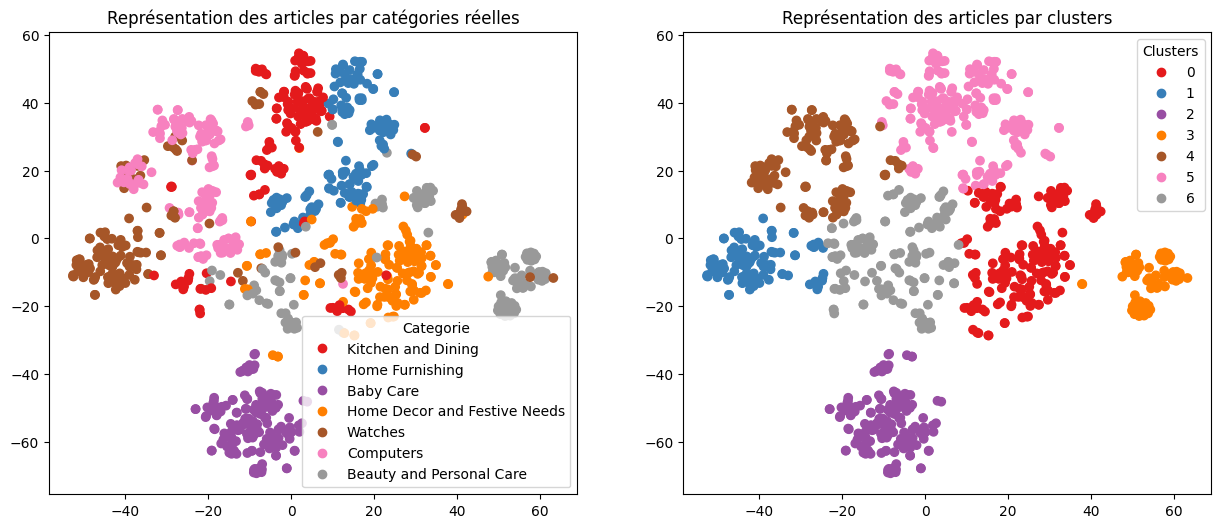

ARI :  0.4755


In [45]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C7"> 4.2 Word embedding</a>
<a href="#top">sommaire</a>

## <a name="C8"> 4.2.a Word2Vec</a>
<a href="#top">sommaire</a>

Transforme les mots en vecteurs numériques pour capturer leurs relations sémantiques.

In [46]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [47]:
w2v_size = 300 # la dimension des vecteurs
w2v_window = 5 # la taille de la fenêtre de contexte
w2v_min_count = 1 # le nombre minimum d'occurrences d'un mot
w2v_epochs = 100 # le nombre d'époques d'entraînement
maxlen = 379 # adapt to length of sentences la longueur maximale des phrases
descriptions = df_clean['description_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [48]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(descriptions)
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4716
Word2Vec trained


In [49]:
# Préparation des descriptions (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_descriptions = pad_sequences(tokenizer.texts_to_sequences(descriptions),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words) #le nombre total de mots uniques dans le vocabulaire tokenisé

Fit Tokenizer ...
Number of unique words: 4717


## Création de la matrice d'embedding

In [50]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4717, 300)


## Création du modèle d'embedding

In [51]:
# Création du modèle

input=Input(shape=(len(x_descriptions), maxlen), dtype='float64')
word_input=Input(shape=(maxlen,), dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input], word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 379)]             0         
                                                                 
 embedding (Embedding)       (None, 379, 300)          1415100   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,415,100
Trainable params: 1,415,100
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [52]:
embeddings = embed_model.predict(x_descriptions)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


2023-08-15 13:26:18.049186: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(1050, 300)

In [53]:
ARI, X_tsne, labels, time2 = ARI_fct(embeddings)
ari_word_vec = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_word_vec

ARI :  0.3217 time :  3.42


,ARI,time
0,0.3217,3.42


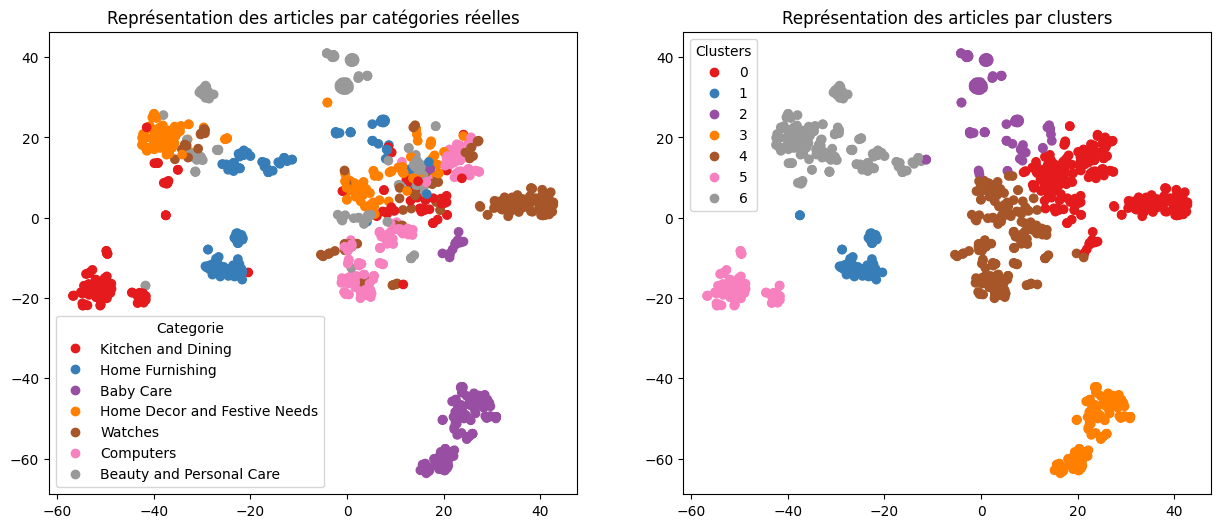

ARI :  0.3217


In [54]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C9"> 4.2.b BERT (Bidirectional Encoder Representations from Transformers)</a>
<a href="#top">sommaire</a>

Modèle pré-entraîné qui capture les significations contextuelles des mots en analysant les deux directions du texte


In [55]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [56]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  1
False


## Fonctions communes

In [57]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [58]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
descriptions = df_clean['description_dl'].to_list()

In [59]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 30ms/step
temps traitement :  11.0


In [60]:
features_bert.shape

(1050, 768)

In [61]:
ARI, X_tsne, labels, time2 = ARI_fct(features_bert)
ari_bert_hugf = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_bert_hugf

ARI :  0.328 time :  3.57


,ARI,time
0,0.328,3.57


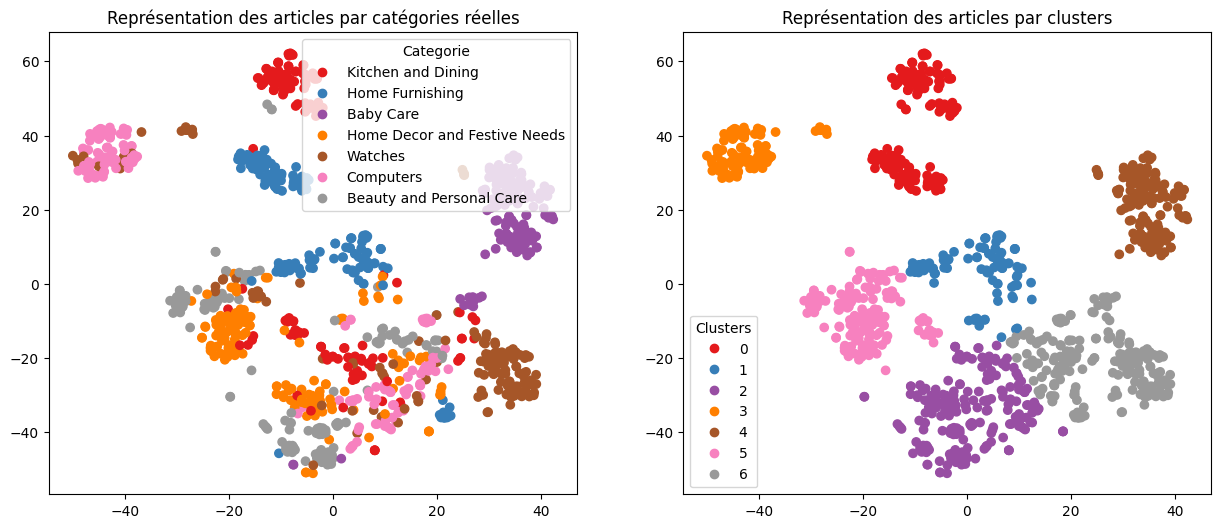

ARI :  0.328


In [62]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [63]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [64]:
df_clean.columns

Index(['image', 'description', 'category', 'description_bow',
       'description_bow_lem', 'description_dl', 'length_bow', 'length_dl'],
      dtype='object')

In [65]:
descriptions = df_clean['description_dl'].to_list()

In [66]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  49.0


In [67]:
features_bert.shape

(1050, 768)

In [68]:
ARI, X_tsne, labels, time2 = ARI_fct(features_bert)
ari_bert_hubt = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_bert_hubt

ARI :  0.3251 time :  3.74


,ARI,time
0,0.3251,3.74


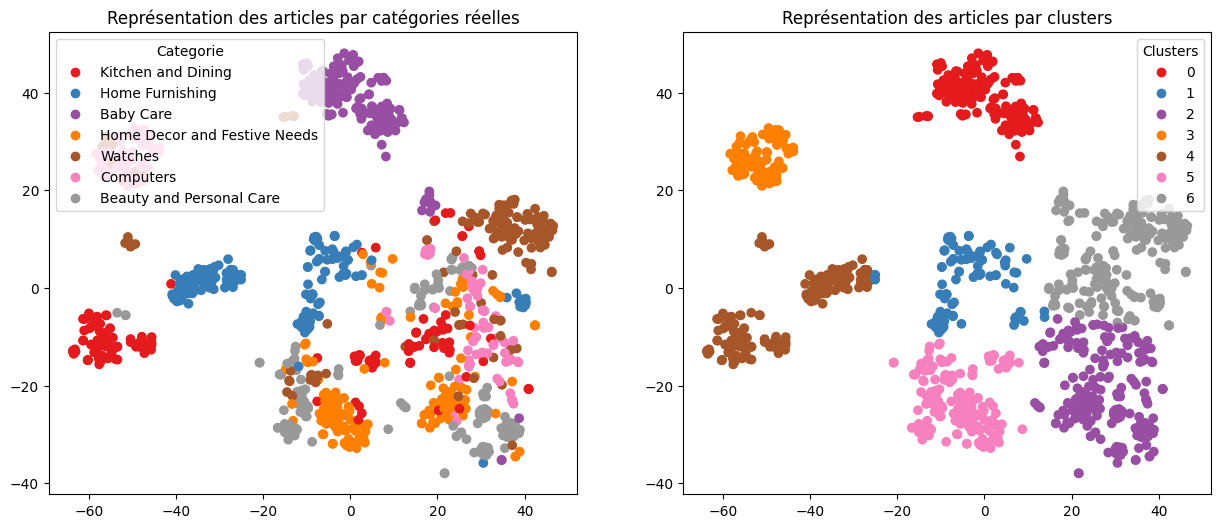

ARI :  0.3251


In [69]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C10"> 4.2.c USE - Universal Sentence Encoder</a>
<a href="#top">sommaire</a>

Génère des embeddings pour les phrases et les paragraphes entiers, en capturant leur signification sémantique.

In [70]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [71]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  1
False


In [72]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [73]:
def feature_USE_fct(descriptions, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(descriptions)//batch_size) :
        idx = step*batch_size
        feat = embed(descriptions[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [74]:
batch_size = 10
descriptions = df_clean['description_dl'].to_list()

In [75]:
features_USE = feature_USE_fct(descriptions, batch_size)

In [76]:
features_USE.shape

(1050, 512)

In [77]:
ARI, X_tsne, labels, time2 = ARI_fct(features_USE)
ari_use = pd.DataFrame({"ARI": [ARI], "time": [time2]})
ari_use

ARI :  0.4486 time :  3.42


,ARI,time
0,0.4486,3.42


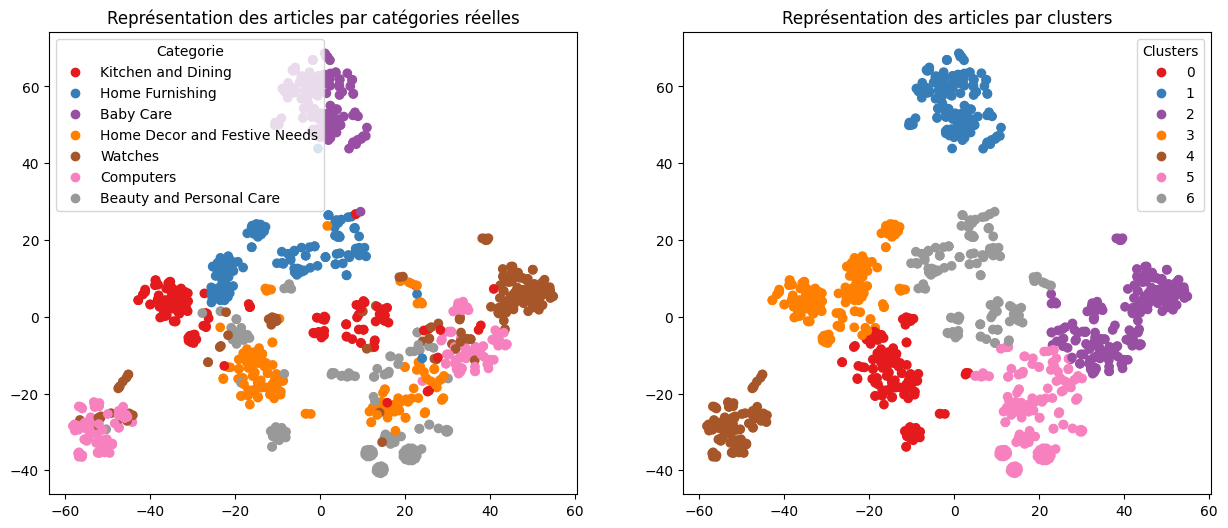

ARI :  0.4486


In [78]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C11"> 4.3 Comparaison des résultats de clustering</a>
<a href="#top">sommaire</a>

In [79]:
res_clust = pd.concat([ari_cv, ari_tf_idf, ari_word_vec, ari_bert_hugf, ari_bert_hubt, ari_use])
res_clust.index = ["count_vector", "tf_idf", "word2vec", "bert_hugface", "bert_hubtenf", "use"]
res_clust

,ARI,time
count_vector,0.4077,4.54
tf_idf,0.4755,3.82
word2vec,0.3217,3.42
bert_hugface,0.3280,3.57
bert_hubtenf,0.3251,3.74
use,0.4486,3.42


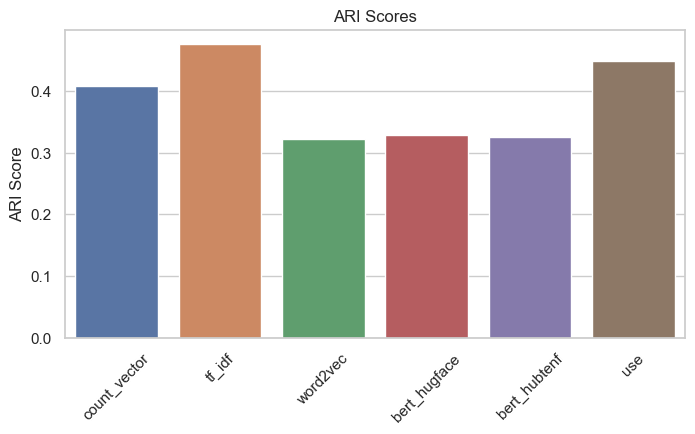

In [80]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Create bar plot using seaborn for 'ARI'
plt.figure(figsize=(8, 4))
sns.barplot(x=res_clust.index, y="ARI", data=res_clust)
plt.title('ARI Scores')
plt.ylabel('ARI Score')
plt.xticks(rotation=45)
plt.show()

### On obtient de meilleurs scores avec TF-IDF. On peut conclure que la classification est réalisable d'après nos analyses.

# <a name="C12"> 5.1 Classification Supervisée</a>
<a href="#top">sommaire</a>

In [81]:
label_en = LabelEncoder()
df_clean['label_category'] = label_en.fit_transform(
    np.array(df_clean['category']))
label = ['0', '1', '2', '3', '4', '5', '6']

In [82]:
# df_clean.to_csv("df_clean.csv", index=False)

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [84]:
df_clean.head(1)

,image,description,category,description_bow,description_bow_lem,description_dl,length_bow,length_dl,label_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",Home Furnishing,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance ...,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance p...,"key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , eleg...",156,248,4


## Tf Idf

In [85]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
cv_fit = cvect.fit(df_clean[feat])
ctf_fit = ctf.fit(df_clean[feat])

cv_transform = cvect.transform(df_clean[feat])  
ctf_transform = ctf.transform(df_clean[feat]) 

In [86]:
df_ctf = pd.DataFrame(ctf_transform.toarray(), columns=ctf.get_feature_names_out())
df_ctf.head()

000  001  0021  004  005  006  0083  011  01433cmgy  01727lpln  01741lpln  \
0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0        0.0        0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0        0.0        0.0   
2  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0        0.0        0.0   
3  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0        0.0        0.0   
4  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0        0.0        0.0   

   01784bmly  03918cmly   04  04615cmgy  050  052  05712lmly  05tg   06  063  \
0        0.0        0.0  0.0        0.0  0.0  0.0        0.0   0.0  0.0  0.0   
1        0.0        0.0  0.0        0.0  0.0  0.0        0.0   0.0  0.0  0.0   
2        0.0        0.0  0.0        0.0  0.0  0.0        0.0   0.0  0.0  0.0   
3        0.0        0.0  0.0        0.0  0.0  0.0        0.0   0.0  0.0  0.0   
4        0.0        0.0  0.0        0.0  0.0  0.0        0.0   0.0  0.0  0.0   

   06362cmgy  064  069  07034lmli  074   08  085   09  09321cmgy  099   10  \
0        0.0  0.0  0.0        0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0   
1        0.0  0.0  0.0        0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0   
2        0.0  0.0  0.0        0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0   
3        0.0  0.0  0.0        0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0   
4        0.0  0.0  0.0        0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0   

        100  1000  1001  10024982  1008ax  101  1010  1014tx  1015  1015nr  \
0  0.039695   0.0   0.0       0.0     0.0  0.0   0.0     0.0   0.0     0.0   
1  0.000000   0.0   0.0       0.0     0.0  0.0   0.0     0.0   0.0     0.0   
2  0.074911   0.0   0.0       0.0     0.0  0.0   0.0     0.0   0.0     0.0   
3  0.000000   0.0   0.0       0.0     0.0  0.0   0.0     0.0   0.0     0.0   
4  0.075876   0.0   0.0       0.0     0.0  0.0   0.0     0.0   0.0     0.0   

   101b0101  1020el  1033  1038       104  1042  1045  1049  105key  107  \
0       0.0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0     0.0  0.0   
1       0.0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0     0.0  0.0   
2       0.0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0     0.0  0.0   
3       0.0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0     0.0  0.0   
4       0.0     0.0   0.0   0.0  0.066475   0.0   0.0   0.0     0.0  0.0   

   1071  1075  107750  108  1080  1085  10890  1092  1099  109b0109  \
0   0.0   0.0     0.0  0.0   0.0   0.0    0.0   0.0   0.0       0.0   
1   0.0   0.0     0.0  0.0   0.0   0.0    0.0   0.0   0.0       0.0   
2   0.0   0.0     0.0  0.0   0.0   0.0    0.0   0.0   0.0       0.0   
3   0.0   0.0     0.0  0.0   0.0   0.0    0.0   0.0   0.0       0.0   
4   0.0   0.0     0.0  0.0   0.0   0.0    0.0   0.0   0.0       0.0   

   10btsc2012gb   11       110  1100  11000026  111  112  1132  1141ym22  \
0           0.0  0.0  0.000000   0.0       0.0  0.0  0.0   0.0       0.0   
1           0.0  0.0  0.000000   0.0       0.0  0.0  0.0   0.0       0.0   
2           0.0  0.0  0.000000   0.0       0.0  0.0  0.0   0.0       0.0   
3           0.0  0.0  0.078407   0.0       0.0  0.0  0.0   0.0       0.0   
4           0.0  0.0  0.000000   0.0       0.0  0.0  0.0   0.0       0.0   

   1142301  1143  1148  1149  1150  1153  1155  1170  1183  119  1195  1199  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   

   11n  11oz   12  120  1200  12011ppgw  121  1216  122  1234  12399  1240sg  \
0  0.0   0.0  0.0  0.0   0.0        0.0  0.0   0.0  0.0   0.0    0.0     0.0   
1  0.0   0.0  0.0  0.0   0.0        0.0  0.0   0.0  0.0   0.0    0.0     0.0   
2  0.0   0.0  0.0  0.0   0.0        0.0  0.0   

In [87]:
X = df_ctf.copy()

## pca

On effectue une réduction de dimension avec PCA.

In [88]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [89]:
pca.explained_variance_ratio_

array([3.52012610e-02, 2.44876924e-02, 1.91866608e-02, ...,
       8.98398922e-33, 6.61383536e-33, 9.74536957e-34])

In [90]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [91]:
len(cumsum)

1050

Text(0, 0.5, 'Cumulative Explained Variance')

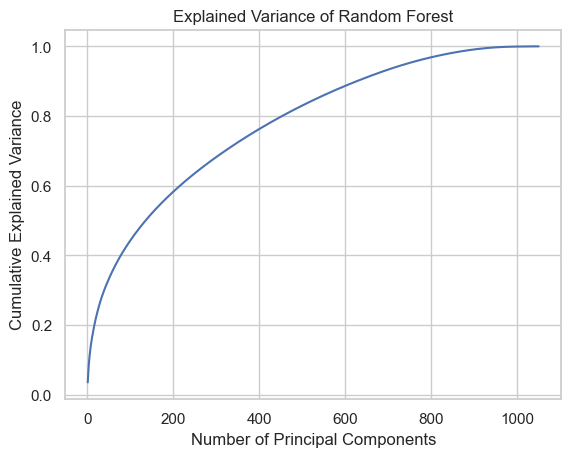

In [92]:
plt.plot(range(1, len(cumsum)+1), cumsum)
plt.title('Explained Variance of Random Forest')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

In [93]:
# Avec 500 composantes, on a près de 80 % de variance.
X_pca = X_pca[:, :500]

In [94]:
X_pca.shape

(1050, 500)

In [95]:
X_train = pd.DataFrame(X_pca)
y_train = df_clean.label_category

In [96]:
estimator = RandomForestClassifier()
param_grid = {}
cv = 5

In [97]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1, param_grid={},
             return_train_score=True)

In [98]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.685748,0.01992,0.005278,0.000139,{},0.841905,0.086263,1,1.0,0.0


## Gridsearch pour nombre de components

In [99]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("reduction", PCA()), 
    ("estimator", RandomForestClassifier()),
     ])

In [100]:
scaler_list = [StandardScaler()]

In [101]:
n_components = np.linspace(500, 1000, 100).astype(int)
n_components

array([ 500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        555,  560,  565,  570,  575,  580,  585,  590,  595,  601,  606,
        611,  616,  621,  626,  631,  636,  641,  646,  651,  656,  661,
        666,  671,  676,  681,  686,  691,  696,  702,  707,  712,  717,
        722,  727,  732,  737,  742,  747,  752,  757,  762,  767,  772,
        777,  782,  787,  792,  797,  803,  808,  813,  818,  823,  828,
        833,  838,  843,  848,  853,  858,  863,  868,  873,  878,  883,
        888,  893,  898,  904,  909,  914,  919,  924,  929,  934,  939,
        944,  949,  954,  959,  964,  969,  974,  979,  984,  989,  994,
       1000])

In [102]:
param_grid = { "reduction" : [PCA()], 
               "estimator" : [RandomForestClassifier(random_state=0)], 
               "reduction__n_components": n_components
             }

In [103]:
X.shape

(1050, 5326)

In [104]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [105]:
grid = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, return_train_score=True, verbose=3)
grid.fit(X, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=500;, score=(train=1.000, test=0.882) total time=   3.3s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=510;, score=(train=1.000, test=0.871) total time=   3.5s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=525;, score=(train=1.000, test=0.901) total time=   3.4s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=535;, score=(train=1.000, test=0.890) total time=   3.0s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=540;, score=(train=1.000, test=0.932) total time=   3.6s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=PCA(), reduction__n_components=550;, score=(train=1.000, test=0.916) total time=   3.5s
[CV 4/5] END estimator=RandomForestClassifier(), reduct

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('reduction', PCA()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'reduction': [PCA(n_components=540)],
                         'reduction__n_components': array([ 500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        55...
        611,  616,  621,  626,  631,  636,  641,  646,  651,  656,  661,
        666,  671,  676,  681,  686,  691,  696,  702,  707,  712,  717,
        722,  727,  732,  737,  742,  747,  752,  757,  762,  767,  772,
        777,  782,  787,  792,  797,  803,  808,  813,  818,  823,  828,
        833,  838,  843,  848,  853,  858,  863,  868,  873,  878,  883,
        888,  893,  898,  904,  909,  914,  919,  924,  929,  934,  939,
        944,  949,  954,  959,  964,  969,  974,  979,  984,  989,  994,
       1000])},
             return_train_score=True, verbose=3)

In [106]:
cols1 = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params', 'mean_test_score', 'std_test_score', 'rank_test_score',
       'mean_train_score', 'std_train_score']

In [107]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res1 = res.sort_values("rank_test_score").head(1)[cols1]
res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,3.375671,0.187898,0.067708,0.005456,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.911027,0.022763,1,1.0,0.0


In [108]:
res.sort_values("rank_test_score").head()[cols1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,3.375671,0.187898,0.067708,0.005456,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.911027,0.022763,1,1.0,0.0
25,4.012513,0.097100,0.080580,0.003939,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.907985,0.025945,2,1.0,0.0
9,3.389711,0.191478,0.078741,0.007628,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.907985,0.016902,2,1.0,0.0
27,2.287682,0.133116,0.081052,0.002795,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.907224,0.024120,4,1.0,0.0
10,3.414210,0.038241,0.078266,0.005933,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.906464,0.013303,5,1.0,0.0


Selon les résultats, le nombre optimal de composantes est 540.

Text(0, 0.5, 'accuracy')

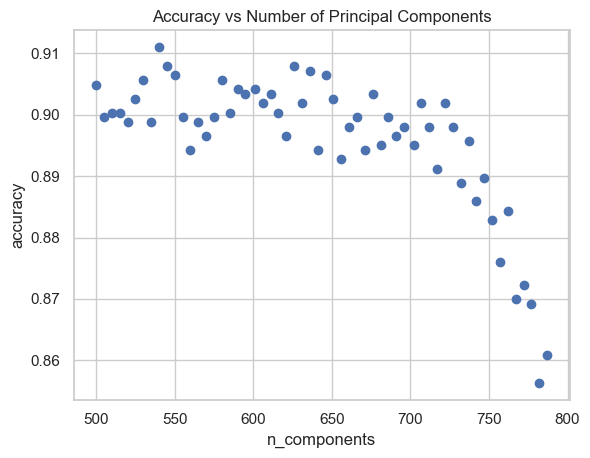

In [109]:
plt.scatter(res.param_reduction__n_components, res.mean_test_score)
plt.title('Accuracy vs Number of Principal Components')
plt.xlabel('n_components')
plt.ylabel('accuracy')

# SVC

In [110]:
from sklearn.svm import SVC

pipe2 = Pipeline([
    ("reduction", PCA()),
    ("estimator", SVC(random_state=0)),  # Support Vector Machine pour classification
])


In [111]:
param_grid2 = {}

In [112]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [113]:
grid2 = GridSearchCV(pipe2, param_grid2, cv=cv, n_jobs=-1, return_train_score=True)
grid2.fit(X, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('reduction', PCA()),
                                       ('estimator', SVC())]),
             n_jobs=-1, param_grid={}, return_train_score=True)

In [114]:
res = pd.DataFrame(grid2.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res2 = res[cols]
res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,1.321003,0.026384,0.159492,0.003055,{},0.923194,0.013898,1,0.999492,0.000622


In [115]:
res2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'params', 'mean_test_score', 'std_test_score', 'rank_test_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

# XGBClassifier

In [116]:
from xgboost import XGBClassifier

pipe3 = Pipeline([
    ("reduction", PCA()),
    ("estimator", XGBClassifier(random_state=0)),  # Use XGBClassifier for classification
])


In [117]:
param_grid3 = {}

In [118]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [119]:
grid3 = GridSearchCV(pipe3, param_grid3, cv=cv, n_jobs=-1, return_train_score=True)
grid3.fit(X, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('reduction', PCA()),
                                       ('estimator',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1, param_grid={}, return_train_score=True)

In [120]:
res = pd.DataFrame(grid3.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res3 = res[cols]
res3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,11.220321,0.085585,0.061624,0.000223,{},0.911027,0.024477,1,1.0,0.0


# <a name="C13"> 5.2 Comparaison des résultats de classification supervisée</a>
<a href="#top">sommaire</a>

In [121]:
res_sup_text = pd.concat([res1, res2, res3])
res_sup_text.index = ["Random Forest", "SVC", "XGBoost"]
res_sup_text[['mean_fit_time', 'params', 'mean_test_score', 'mean_train_score']]

,mean_fit_time,params,mean_test_score,mean_train_score
Random Forest,3.375671,"{'estimator': RandomForestClassifier(), 'reduction': PCA(n_components=540), 'reduction__n_compon...",0.911027,1.000000
SVC,1.321003,{},0.923194,0.999492
XGBoost,11.220321,{},0.911027,1.000000


On obtient de meilleurs résultats avec le SVC.